# Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ &mdash; столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_n$ &mdash; столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_n$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением &mdash; то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_n$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$ записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N &mdash; количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов, в $n$ различных моментов времени &mdash; это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ &mdash; это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обобщающая способность. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них &mdash; о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям. Например, если мы приближаем функцию одной переменной по значениям в $n$ точках, то наилучшей с точки зрения этой ошибки моделью будет многочлен $(n-1)$-й степени, для которого эта ошибка будет равна нулю.  Тем не менее, вряд ли истинная зависимость имеет вид многочлена большой степени. Более того, значения вам скорее всего даны с погрешностью, то есть вы подогнали вашу модель под свои зашумлённые данные, но на любых других данных (то есть в других точках) точность, скорее всего, окажется совсем не такой хорошей. Этот эффект называют **переобучением**; говорят также, что **обобщающая способность** модели оказалась скверной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Задание 1. Метод наименьших квадратов

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором &mdash; тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом &mdash; $n$ точек (значения аргумента $x$), во втором &mdash; значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача &mdash; по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from math import log, inf
import math
from sklearn.model_selection import train_test_split

In [2]:
data_train = np.loadtxt('train.txt', delimiter=',')
data_test = np.loadtxt('test.txt', delimiter=',')

Разделим значения $x$ и $y$

In [6]:
X_train = data_train[:,0]
y_train = data_train[:,1]
X_test = data_test[:,0]
y_test = data_test[:,1]
# Сделайте то же для тестовой выборки

Зададим максимальную степень многочлена

In [7]:
level = 10

Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``).

Выведем явную формулу для многочлена первой степени, получим вектор a из двух элементов: первый будет k, а второй b (т.к. y =  x * $a_0$ + 1 * $a_1$)

In [8]:
y = list()
for j in range(2,3):
    X = np.array(X_train**(0))
    X = X.reshape(1,X_train.size).T
    for i in range(1,j):
        temp = (X_train**(i)).reshape(1,X_train.size).T
        X = np.concatenate((temp,X), axis=1)
    a = ((np.linalg.inv(X.T.dot(X))).dot(X.T)).dot(y_train)
    y.append(X.dot(a))
print(a[0],a[1])

2.27913449805195 4.433230905064935


y = 2.27913449805195x + 4.433230905064935

Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором - по парам из тестовых данных).

Для $k = 1,2,3,4,6$ напечатайте коэффициенты полученных многочленов и нарисуйте их графики на одном чертеже вместе с точками $(x_i, y_i)$ (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

### Расчёт многочленов 

Для удобства я вычислю сразу все $\hat{y}$. А $x_1 \dots x_n$ я возьму из X_train. Таким образом при умножении матрицы X на A я получу многочлены разных степеней с подобранными коэффициентами 
$$
\hat{y_1} = 
\begin{aligned}
\begin{pmatrix}
x_1& 1 \\
x_2& 1 \\
\dots & \dots \\
x_n& 1
\end{pmatrix}
\end{aligned}
\begin{aligned}
\begin{pmatrix}
a_1 \\
a_2
\end{pmatrix}
\end{aligned}
$$
$$
\hat{y_2} = 
\begin{aligned}
\begin{pmatrix}
x_1^2 & x_1 & 1 \\
x_2^2 & x_2 & 1 \\
\dots & \dots & \dots\\
x_n^2 & x_n & 1
\end{pmatrix}
\end{aligned}
\begin{aligned}
\begin{pmatrix}
a_1\\
a_2\\
a_3
\end{pmatrix}
\end{aligned}
$$
$$
\hat{y_{10}} = 
\begin{aligned}
\begin{pmatrix}
x_1^{10} & x_1^9 & \dots & 1 \\
x_2^{10} & x_2^9 & \dots & 1 \\
\dots & \dots & \dots & \dots\\
x_n^{10} & x_n^9 & \dots & 1
\end{pmatrix}
\end{aligned}
\begin{aligned}
\begin{pmatrix}
a_1\\
\dots \\
a_{10}
\end{pmatrix}
\end{aligned}
$$

In [9]:
y_hat_train = list()
y_hat_test = list()
for j in range(2,level+2):
    #рассчитываем матрицу коэффициентов для тренировочных данных
    
    X = np.array(X_train**(0))
    X = X.reshape(1,X_train.size).T
    for i in range(1,j):
        temp = (X_train**(i)).reshape(1,X_train.size).T
        X = np.concatenate((temp,X), axis=1)
        
    #находим a по тренировочной выборке
    
    a = ((np.linalg.inv(X.T.dot(X))).dot(X.T)).dot(y_train)
    
    #распечатаем вектор коэффициентов
    print("Многочлен {} степени: \n".format(j-1),end="  ")
    for i in range(len(a),0,-1):
        print(a[i-1],end=" ")
    print()
    #находим вектор y_hat для тренировочной выборки
    
    y_hat_train.append(X.dot(a))
    
    #по аналогии расчитываем матрицу коэффициентов для тестовых данных 
    
    X1 = np.array(X_test**(0))
    X1 = X1.reshape(1,X_test.size).T
    for i in range(1,j):
        temp = (X_test**(i)).reshape(1,X_test.size).T
        X1 = np.concatenate((temp,X1), axis=1)
    
    #находим y_hat для тестовой выборки, взяв вектор коэффициентов a
    y_hat_test.append(X1.dot(a))

Многочлен 1 степени: 
  4.433230905064935 2.27913449805195 
Многочлен 2 степени: 
  4.472476503404163 1.1578316883597197 1.4016285121152792 
Многочлен 3 степени: 
  4.460736355285103 1.065016105285253 1.8597508372608171 -0.3817686042879749 
Многочлен 4 степени: 
  4.341166120399729 1.171802392631793 6.794091784358237 -13.051328119992462 7.918474697316448 
Многочлен 5 степени: 
  4.431297813822728 -0.13059803987155894 3.2747144018451344 21.374796276112363 -51.131481385142294 29.524978041243422 
Многочлен 6 степени: 
  4.3837950110208626 -4.59717932481035 16.002903990013422 121.2570971220789 -481.51013285728015 581.4532982077758 -229.97013340279443 
Многочлен 7 степени: 
  4.44451270943062 -4.008895912184055 7.2154586027382095 119.3507842733556 -314.2311724665734 122.87821702987185 238.69936783522462 -167.38196472286336 
Многочлен 8 степени: 
  4.66378910948827 -5.18277353233688 -26.695631078138362 268.8604402004468 109.89566801641433 -3132.856393514424 6760.628471229213 -5701.7101960971

Нарисуйте на плоскости точки $(x_i, y_i)$ и полученную линейную функцию. Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию. Найдите этот многочлен и нарисуйте его график.

### Иллюстрация функций

Для наглядности нарисуем график тренировочных данных и график $\hat{y}$ = kx + b (предсказанных данных), который лежит у нас в $y_0$, чтобы посмотреть приближение нашего вектора предсказаний к реальным значениям.

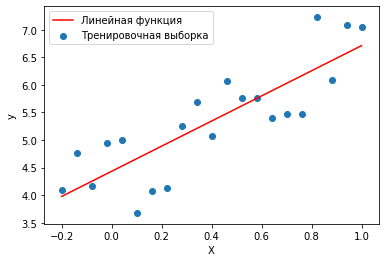

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train, label='Тренировочная выборка')
plt.plot(X_train,y_hat_train[0],color='red',label='Линейная функция')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

Теперь нарисуем график всех многочленов по тренировочной выборке

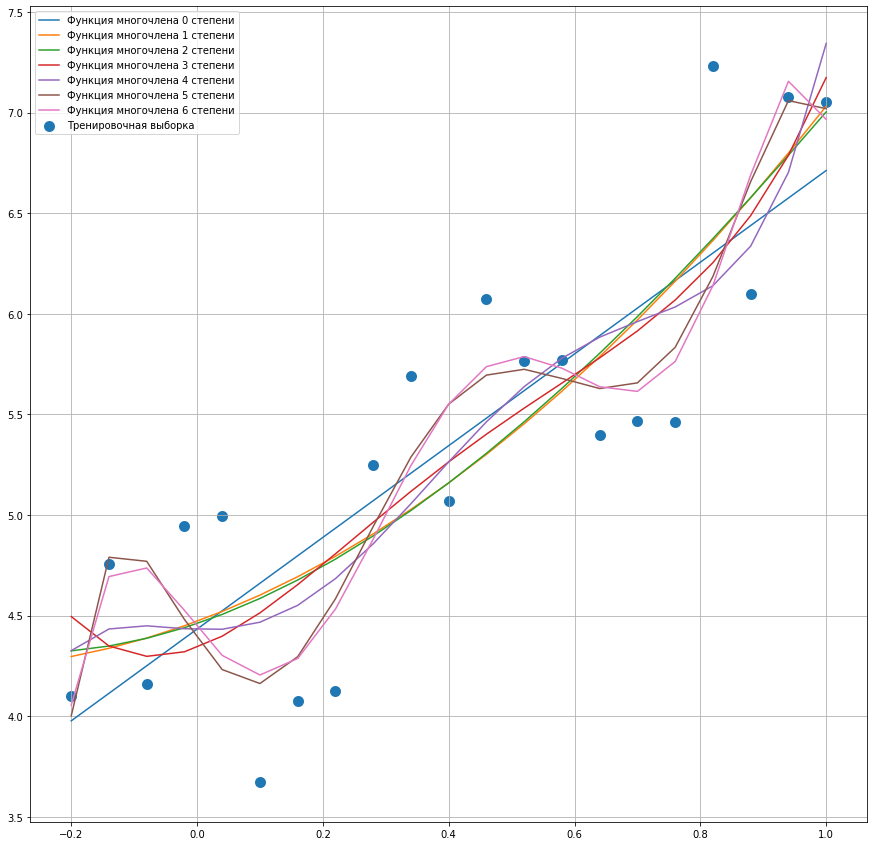

In [11]:
plt.figure(figsize=(15,15))
for i in range(7):
    plt.plot(X_train,y_hat_train[i],label='Функция многочлена {} степени'.format(i))
plt.scatter(X_train,y_train, label='Тренировочная выборка', linewidth = 5)
plt.legend()
plt.grid(True)

Тоже самое сделаем для тестовой выборки и увидим разницу

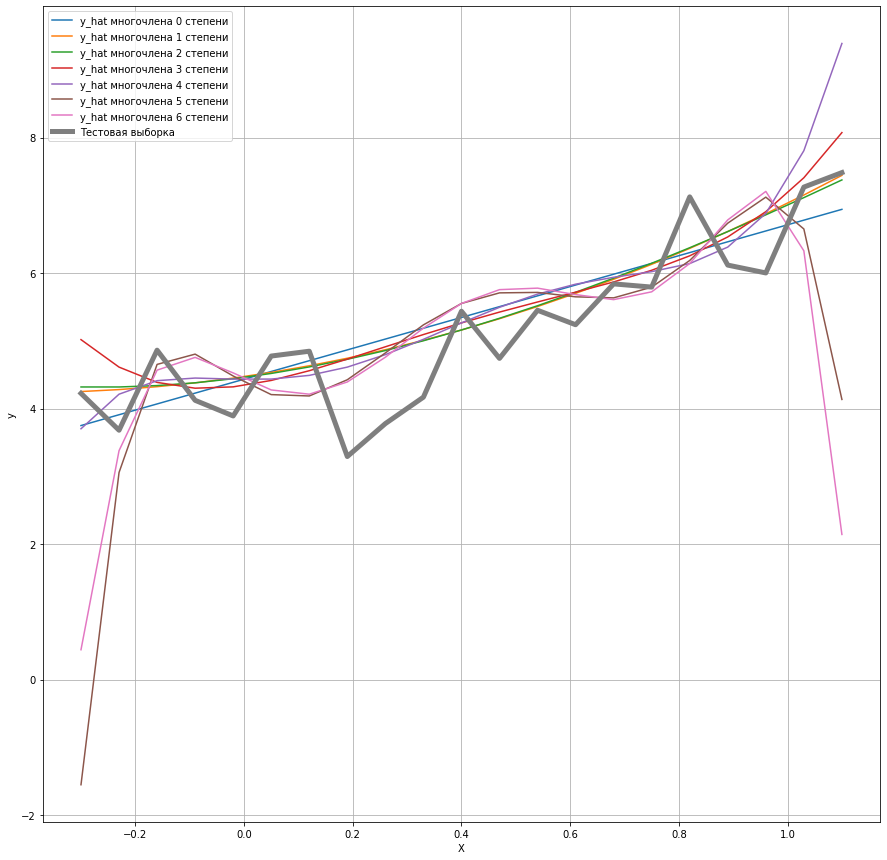

In [12]:
plt.figure(figsize=(15,15))
for i in range(0,7):
    plt.plot(X_test,y_hat_test[i],label='y_hat многочлена {} степени'.format(i))
plt.plot(X_test,y_test, label='Тестовая выборка', linewidth = 5)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)

### Вычисление ошибки

Теперь посчитаем ошибку на обучающих и тестовых данных, для этого у меня уже есть нужные $\hat{y_1} \dots \hat{y_{10}}$, осталось просуммировать значения во всех точках для каждого вектора $\hat{y_i}$

In [13]:
summary_train = list()
for i in range(level):
    sum = 0
    for j in range(len(y_train)):
        sum += (y_hat_train[i][j] - y_train[j])**2
    summary_train.append(sum/len(y_train))

По аналогии посчитаем ошибку для тестовых данных

In [14]:
summary_test = list()
for i in range(level):
    sum = 0
    for j in range(len(y_test)):
        sum += (y_hat_test[i][j] - y_test[j])**2
    summary_test.append(sum/len(y_test))

Сравним результаты ошибки на обучающих и тестовых данных. Для наглядности нарисуем график.

In [15]:
for i in range(len(summary_train)):
    print('Степень многочлена:',i+1, 'Тренировочная:',summary_train[i], 'Тестовая:',summary_test[i])

Степень многочлена: 1 Тренировочная: 0.2968966332625195 Тестовая: 0.43512020040488836
Степень многочлена: 2 Тренировочная: 0.2696989158766915 Тестовая: 0.35647628878312126
Степень многочлена: 3 Тренировочная: 0.269497187147961 Тестовая: 0.3553464571518453
Степень многочлена: 4 Тренировочная: 0.2610665330579275 Тестовая: 0.44172701892835503
Степень многочлена: 5 Тренировочная: 0.24998504648317535 Тестовая: 0.5579732021834222
Степень многочлена: 6 Тренировочная: 0.18829348988369757 Тестовая: 2.581692932354826
Степень многочлена: 7 Тренировочная: 0.18539621153294275 Тестовая: 2.515782894960907
Степень многочлена: 8 Тренировочная: 0.15905556579084332 Тестовая: 4.357288367990625
Степень многочлена: 9 Тренировочная: 0.15847184274731146 Тестовая: 4.776344642231221
Степень многочлена: 10 Тренировочная: 0.15316611256458532 Тестовая: 14.632754785844874


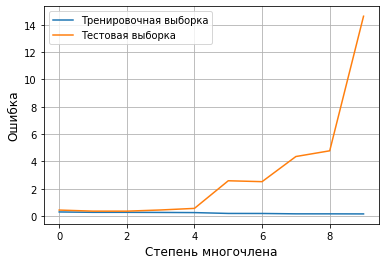

In [16]:
plt.plot(summary_train, label='Тренировочная выборка')
plt.plot(summary_test, label='Тестовая выборка')
plt.xlabel('Степень многочлена', fontsize=12)
plt.ylabel('Ошибка', fontsize=12)
plt.legend()
plt.grid(True)

### Вывод

Изучив ошибки на разных выборках я делаю вывод, что на обучающей выборке ошибка будет уменьшаться с ростом степени многочлена до $n-1$ степени для $n$ точек, а на тестовой - минимальная ошибка будет у многочлена 3 степени.

Проверим это для 20 степени. К сожалению, перемножение вещественных чисел некорректно в питоне, поэтому воспользуемся встроенной функцией, чтобы ошибка при перемноженнии и обращении матриц была минимальна.

In [17]:
X = np.array(X_train**(0))
X = X.reshape(1,X_train.size).T
for i in range(1,22):
    temp = (X_train**(i)).reshape(1,X_train.size).T
    X = np.concatenate((temp,X), axis=1)
a = np.linalg.lstsq(X, y_train, rcond=None)[0]
y_hat = X.dot(a)

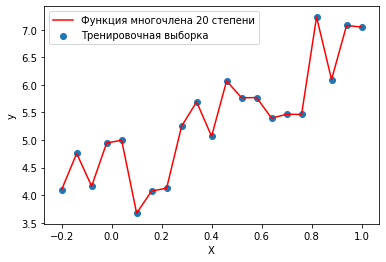

In [18]:
plt.scatter(X_train,y_train, label='Тренировочная выборка')
plt.plot(X_train,y_hat,color='red',label='Функция многочлена 20 степени')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

In [19]:
for i in range(level):
    sum = 0
    for j in range(len(y_train)):
        sum += (y_hat[j] - y_train[j])**2
print('Ошибка многочлена 20 степени',sum)

Ошибка многочлена 20 степени 5.572155430805825e-06


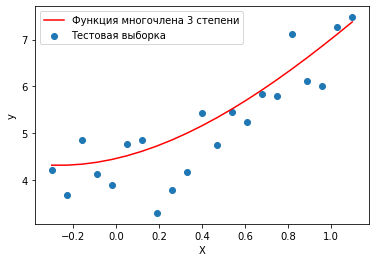

In [20]:
plt.scatter(X_test,y_test, label='Тестовая выборка')
plt.plot(X_test,y_hat_test[2],color='red',label='Функция многочлена 3 степени')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$?

Дело в том, что мы даём модели определённую выборку с определёнными точками. В случае тренировочной выборки увеличение степени многочлена давало нам более точные данные т.к. мы скармливаем модели те же точки, что и во время вычисления вектора $\hat{a}$. В случае тестовой выборки мы показываем модели новые точки и чем выше степень полинома, тем сложнее данная функция, а значит и разброс точек будет выше.

### Задание 2. Линейная регрессия

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами.

С помощью известных вам формул найдите регрессионные коэффициенты. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество приближения, вычислив среднеквадратическую ошибку.

In [21]:
flats = np.loadtxt('flats_moscow_mod.txt', skiprows = 1, delimiter='\t')

In [22]:
flats_y = flats[:,0]
flats_X = flats[:,1:]

# добавим сдвиг из единичек
X = np.array(np.ones(flats_X.shape[0]))
X = X.reshape(flats_X.shape[0],1)
flats_X = np.concatenate((flats_X,X), axis=1)

Посчитаем $\hat{a}$ по известной нам формуле и рассчитаем вектор предсказываемых значений для данной выборки.

In [23]:
a_hat = np.linalg.inv(flats_X.T.dot(flats_X)).dot(flats_X.T).dot(flats_y)
y_hat = flats_X.dot(a_hat)

In [24]:
print("Общая жил.площадь: ", a_hat[0])
print("Жилая площадь: ", a_hat[1])
print("Площадь кухни: ", a_hat[2])
print("Расстояние от центра: ", a_hat[3])
print("Расстояние до метро: ", a_hat[4])

Общая жил.площадь:  1.4870528861258716
Жилая площадь:  1.6562890012269091
Площадь кухни:  1.8192049792747518
Расстояние от центра:  -3.3271540562740567
Расстояние до метро:  -1.3156886037015727


Заметим, что все коэффициенты положительны за исключением дистанции до метро и до центра. Это вполне логично - чем больше расстояние до метро или до центра, тем хуже жильцу, а значит и стоимость квартиры снижается.

Теперь вычислим ошибку для данной выборки.

In [25]:
summary = 0
for i in range(len(flats_y)):
    summary += (y_hat[i] - flats_y[i])**2
print("Ошибка: ",summary/len(flats_y))

Ошибка:  924.0090032083963


### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению. 

**Сравнение моделей**

Когда вы построите новую модель, вам захочется понять, лучше она или хуже, чем изначальная. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с многочленами: как прекрасно падала ошибка на обучающей выборке с ростом степени!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

### Создание моделей

Для удобства создания других моделей я сделаю массив, в который буду класть свои функции. Эти функции будут модифицировать 
выборку.

In [13]:
models = list()

**Нулевая модель** будет дефолтной, она никак не будет менять выборку

In [14]:
def model_0(X):
    return X

Мы знаем, что общая и жилая площадь квартиры сильно влияют на стоимость, в то время как расстояние влияет меньше. По этому принципу мы возводим в степени значительные переменные и берём log от незначительных. Это будет моя **первая модель**.

In [15]:
def model_1(X):
    for i in range(X.shape[0]):
        X[i][0] = X[i][0]**3
        X[i][1] = X[i][1]**2
        X[i][2] = log(X[i][2])
        X[i][4] = log(X[i][4])
    return X

**Вторая модель** будет схожа с первой, но в ней я добавлю новые столбцы с модифицированными признаками. Однако нужно учитывать важный аспект - линейную независимость между столбцами, функции $x^2$ или log(x) не линейные, а значит мы можем их применять к нашим признакам и добавлять в общую матрицу.

In [19]:
def model_2(X):
    totsp = X[:,0].copy().reshape(X.shape[0],1)
    livesp = X[:,1].copy().reshape(X.shape[0],1)
    dist = X[:,3].copy().reshape(X.shape[0],1)
    metrdist = X[:,4].copy().reshape(X.shape[0],1)
    
    # возведём площади и расстояние до метро в квадрат, а от расстояния до центра возьмём log 
    
    totsp**=2 
    livesp**=2
    for i in range(len(dist)):
        dist[i] = log(dist[i])
    metrdist**=2
    
    # добавим наши столбцы в матрицу X
    X = np.concatenate((X, totsp), axis=1)
    X = np.concatenate((X, livesp), axis=1)
    X = np.concatenate((X, dist), axis=1)
    X = np.concatenate((X, metrdist), axis=1)
    return X

Добавим наши модели в один список.

In [20]:
models = list()
models.append(model_0)
models.append(model_1)
models.append(model_2)

### Тестирование моделей

Итак, чтобы быстро протестировать разные модели я напишу алгоритм, который будет брать функцию из массива models и прогонять через неё выборку, а затем подставлять в формулу для вычисления $\hat{a}$.

Помимо этого я напишу алгоритм, который будет делать 10 делений выборки и усреднять для каждой модели ошибку по 10 тестовым и тренировочным выборкам.

In [25]:
# Заведём двумерный список для тестовой и тренировочной выборки, на i строке будет i-ая выборка, 
# в j-ом столбце будет j-ая модель
 
array_train = list()
array_test = list()

# Обозначим количество делений выборки
selections = 10

for i in range(selections):
    # Разделяем выборку
    
    X_train, X_test, y_train, y_test = train_test_split(flats_X, flats_y, test_size = 0.3, random_state = random.randint(0,100))
    
    # Заведём списки ошибок по двум выборкам для каждой модели
    models_train_error = list()
    models_test_error = list()
    
    # Рассчитываем a_hat и y_hat для каждой модели
    
    for model in range(len(models)):
        a_hat = ((np.linalg.inv(models[model](X_train.copy()).T.dot(models[model](X_train.copy())))).dot(models[model](X_train.copy()).T)).dot(y_train)
        
        y_hat_train = models[model](X_train.copy()).dot(a_hat)
        y_hat_test = models[model](X_test.copy()).dot(a_hat)
        
        # Рассчитываем ошибку для i-ой модели на тренировочной и тестовой выборке
        
        summary_train = 0
        summary_test = 0
        
        for i in range(len(y_train)):
            summary_train += (y_hat_train[i] - y_train[i])**2
        for i in range(len(y_test)):
            summary_test += (y_hat_test[i] - y_test[i])**2
        
        models_train_error.append(summary_train/len(y_train))
        models_test_error.append(summary_test/len(y_test))
        
    array_train.append(models_train_error)
    array_test.append(models_test_error)

# Далее найдём среднее, минимальное и максимальное значение ошибки по 10 выборкам для каждой модели

models_train_error_avg = list()
models_test_error_avg = list()

models_train_error_min = [inf]*len(models)
models_test_error_min = [inf]*len(models)

models_train_error_max = [0]*len(models)
models_test_error_max = [0]*len(models)

for model in range(len(models)):
    summary_tr = 0
    summary_tt = 0
    
    for selection in range(selections):
        if array_train[selection][model] < models_train_error_min[model]:
            models_train_error_min[model] = int(array_train[selection][model])
        if array_test[selection][model] < models_test_error_min[model]:
            models_test_error_min[model] = int(array_test[selection][model])
        if array_train[selection][model] > models_train_error_max[model]:
            models_train_error_max[model] = int(array_train[selection][model])
        if array_test[selection][model] > models_test_error_max[model]:
            models_test_error_max[model] = int(array_test[selection][model])
        
        summary_tr += array_train[selection][model]
        summary_tt += array_test[selection][model]
        
    # Найдём среднее значение по выборкам
    models_train_error_avg.append(int(summary_tr/selections))
    models_test_error_avg.append(int(summary_tt/selections))

Теперь распечатаем усреднённые данные ошибки по тренировочной и тестовой выборке для каждой модели.

In [26]:
df = pd.DataFrame({
     'Тренировочная выборка': models_train_error_avg,
     'Тестовая выборка': models_test_error_avg,
})
df.index.name = 'Номер модели'
df

,Тренировочная выборка,Тестовая выборка
Номер модели,,
0,943,889
1,855,833
2,798,782


Теперь посчитаем среднее, наименьшее и наибольшее улучшение в процентах.  Для вычисления среднего улучшения моих моделей я воспользуюсь такой формулой:

$$ \left(\dfrac{\textit{средняя ошибка дефолтной модели}}{\textit{средняя ошибка модифицированной модели}} - 1  \right) * 100\text{%} $$

Для вычисления максимального улучшения моих моделей я воспользуюсь такой формулой:

$$ \left(\dfrac{\textit{максимальная ошибка дефолтной модели}}{\textit{минимальная ошибка модифицированной модели}} - 1  \right) * 100\text{%} $$

Для вычисления минимального улучшения моих моделей я воспользуюсь такой формулой:

$$ \left(\dfrac{\textit{минимальная ошибка дефолтной модели}}{\textit{максимальная ошибка модифицированной модели}} - 1  \right) * 100\text{%} $$


In [27]:
df = pd.DataFrame({
     'Тренировочная выборка avg %': [int((models_train_error_avg[0]/models_train_error_avg[i] - 1)*100) for i in range(0,len(models))],
     'Тестовая выборка avg %': [int((models_test_error_avg[0]/models_test_error_avg[i] - 1)*100) for i in range(0,len(models))],
     'Тренировочная выборка max %': [int((models_train_error_max[0]/models_train_error_min[i] - 1)*100) for i in range(0,len(models))],
     'Тестовая выборка max %': [int((models_test_error_max[0]/models_test_error_min[i] - 1)*100) for i in range(0,len(models))],
     'Тренировочная выборка min %': [int((models_train_error_min[0]/models_train_error_max[i] - 1)*100) for i in range(0,len(models))],
     'Тестовая выборка min %': [int((models_test_error_min[0]/models_test_error_max[i] - 1)*100) for i in range(0,len(models))],
})
df.index.name = 'Номер модели'
df

,Тренировочная выборка avg %,Тестовая выборка avg %,Тренировочная выборка max %,Тестовая выборка max %,Тренировочная выборка min %,Тестовая выборка min %
Номер модели,,,,,,
0,0,0,16,48,-14,-32
1,10,6,25,64,-6,-23
2,18,13,36,66,1,-21


В результате мы видим, что ошибку можно уменьшить, модифицируя выборку и добавляя больше переменных. С помощью добавления дополнительных столбцов я делаю функцию более гибкой для изменений. Все отличия модифицированных моделей от стандартной представлены в таблице. 

### Задание 3. Регуляризация

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться (то есть будет, но не с помощью приведённой выше формулы). В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы &mdash; необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них &mdash; регуляризация. Сейчас мы рассмотрим одну из её разновидностей &mdash; **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda$ &mdash; некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. Параметр $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регрессии. Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$.

Сперва расчитаем матрицу входных данных для многочлена 6 степени

In [26]:
X = np.array(X_train**(0))
X = X.reshape(1,X_train.size).T
for i in range(1,7):
    temp = (X_train**(i)).reshape(X_train.size,1)
    X = np.concatenate((temp,X), axis=1)

Далее мы найдём $\lambda$ учитывая два параметра - ошибка $\hat{y}$ и величина $\hat{a}$. Искать лямбду я буду очень просто. Задам произвольный интервал, на нём рассмотрю все значения лямбды с интервалом в 0.1, если итоговое значение лямбды будет упираться в левый или правый край интервала, я буду расширять границы до тех пор, пока значение лямбды не окажется между двумя границами интервала

In [27]:
from numpy import linalg
import matplotlib.pyplot as plt

lmbd = 0.0
min_sum = inf
lmbd_correct = 0

while lmbd < 100:
    lmbd += 0.1
    
    # Рассчитаем коэффициенты с учётом лямбды
    a_L2 = ((np.linalg.inv(X.T.dot(X) + lmbd*np.eye(7))).dot(X.T)).dot(y_train)
    y_hat_train_L2 = X.dot(a_L2)
    
    # Посчитаем ошибку на тренировочных данных
    error = 0
    for j in range(len(y_train)):
        error += (y_hat_train_L2[j] - y_train[j])**2
    
    # Сложим квадраты всех коэффициентов
    a_sum = 0
    for i in range(len(a_L2)):
        a_sum += a_L2[i]**2
    
    
    # Найдём такую лямбду, чтобы квадрат коэффициентов и ошибка были минимальными
    if a_sum + error < min_sum:
        min_sum = a_sum + error
        lmbd_correct = lmbd
        
        
print('Лямбда = ',lmbd_correct)

Лямбда =  0.9999999999999999


Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без. Чем первый из них выгодно отличается от второго?

Теперь посчитаем значения $\hat{y}$ и $\hat{a}$ для функции с регуляризацией и без неё

In [28]:
a = ((np.linalg.inv(X.T.dot(X))).dot(X.T)).dot(y_train)
y_hat_test = X.dot(a)
a_L2 = ((np.linalg.inv(X.T.dot(X) + lmbd_correct*np.eye(7))).dot(X.T)).dot(y_train)
y_hat_test_L2 = X.dot(a_L2)
print('a_hat с регуляризацией', a_L2)
print('a_hat без регуляризации',a)

a_hat с регуляризацией [0.11657583 0.1634482  0.24523546 0.39887546 0.73822693 1.25318334
 4.25006977]
a_hat без регуляризации [-229.9701334   581.45329821 -481.51013286  121.25709712   16.00290399
   -4.59717932    4.38379501]


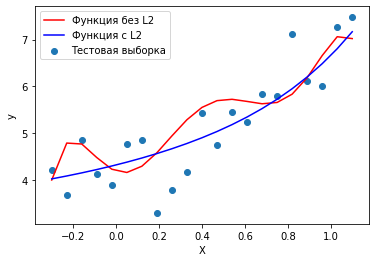

In [29]:
plt.scatter(X_test,y_test, label='Тестовая выборка')
plt.plot(X_test,y_hat_test,color='red',label='Функция без L2')
plt.plot(X_test,y_hat_test_L2,color='blue',label='Функция с L2')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

In [30]:
error_L2 = 0
for j in range(len(y_test)):
    error_L2 += (y_hat_test_L2[j] - y_test[j])**2
print('Ошибка функции с L2 :',error_L2/len(y_test))

Ошибка функции с L2 : 0.30796590170359905


## Вывод

Теперь вспомним какую ошибку нам давал на тестовой выборке многочлен 3 степени, лучше всего приближающий функцию : 0.3553464571518453. Как мы видим - значение усреднённой ошибки многочлена 6 степени с регуляризацией меньше. Дело в том, что без регуляризации наша функция неусточива, поэтому в каких-то местах она будет очень близко к нужной точке, а в каких-то очень далеко (из-за резких скачков и падений). В функции с регуляризацией берётся усреднённое значение, поэтому ошибка меньше.

In [31]:
print(linalg.det(X.T.dot(X)))
print(linalg.det(X.T.dot(X) + lmbd_correct*np.eye(7)))

9.082864838974618e-12
509.2164507942172


$\det(X^TX) = 9.082864838974618e-12 $

$\det(X^TX + \lambda E) = 509.2164507942172$

Почему же наши определители такие разные?

Определитель матрицы $\det(X^TX)$ почти стремится к нулю, а значит в этой матрице есть какие-то линейно зависимые столбцы или строчки. Когда мы добавляем единичную матрицу, умноженную на скаляр, то мы добавляем к одному элементу из каждой строки/столбца какое-то значение, тем самым делая их более линейно независимыми. Таким образом $\det(X^TX + \lambda E)$ сильно возрастает. 

Попробуйте доказать, что вектор $a = (X^TX + \lambda E)^{-1}X^Ty$ является решением задачи

$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min$$

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

---

После того как мы нашли $\lambda$, мы можем зафиксировать $X, y, \lambda$. Тогда получается, что $|Xa - y|^2 + \lambda|a|^2$ зависит только от одной переменной - a. Задача сводится к минимизированию $f(a)$.

### Задание 4. Онлайн-обучение линейной регрессии

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Эту задачу мы будем решать в два этапа.

**Этап 1.** Введём обозначения $X_{(t)} = (x_1\ldots x_t)$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$ и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$!

--

**Алгоритм**
Посмотрим какой вид у нас имеют матрицы $X^T_{(t)}X_{(t)}$. Мы знаем, что матрица $X_t$ по строкам содержит t предсказаний, а по столбцам расположены k признаков. 

Сперва вычислим размеры матриц:

$X^T_{(t)}X_{(t)}$ = (k,t)*(t,k) = (k,k) 

$X^T_{(t)}y_{(t)}$ =  (k,t)*(t,1) = (k,1)

$
\begin{aligned}
\begin{pmatrix}
x_{(11)} & \dots & x_{(t1)} \\
\dots & \dots & \dots \\
x_{(1k)} & \dots & x_{(tk)}
\end{pmatrix}
\end{aligned}
\begin{aligned}
\begin{pmatrix}
x_{(11)} & \dots & x_{(1k)} \\
\dots & \dots & \dots \\
x_{(t1)} & \dots & x_{(tk)}
\end{pmatrix}
\end{aligned}
= 
\begin{aligned}
\begin{pmatrix}
x_1^2 + \dots + x_t^2 & \dots & x_{(11)}x_{(12)} + \dots + x_{(t1)} x_{(t2)} \\
\dots & \dots & \dots \\
x_{(11)}x_{(1k)} + \dots + x_{(tk)} x_{(t1)} & \dots & x_1^2 + \dots + x_t^2
\end{pmatrix}
\end{aligned}
$

$
X^T_{(t+1)}y_{(t+1)} = X^T_{(t)}y_{(t)} + 
\begin{aligned}
\begin{pmatrix}
x_{(t+1)}^2 & \dots & x_{(t+1,k)}x_{(t+1,1)} \\
\dots & \dots & \dots \\
x_{(t+1,1)}x_{(t+1,k)} & \dots & x_{(t+1)}^2
\end{pmatrix}
\end{aligned}
$

Сложность данного алгоритма $O(k^2)$, где k - кол-во признаков

По аналогии вычислим $X^T_{(t+1)}y_{(t+1)}$ :

$X^T_{(t+1)}y_{(t+1)} = X^T_{t}y_{t} + 
\begin{aligned}
\begin{pmatrix}
x_{(t+1,1)}y_{1} \\
\dots \\
x_{(t+1,k)}y_{(t+1)}
\end{pmatrix}
\end{aligned}
$

Сложность данного алгоритма $O(k)$, где k - кол-во признаков

**Этап 2.** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

In [32]:
level = 5 # степень многочлена

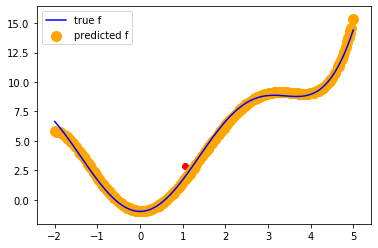

In [33]:
from IPython.display import clear_output
import scipy 
f_true = lambda x: 2*x*np.sin(x) + x**2 - 1 # this is the true function

# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)

# оставим старую выборку для первоначального графика
x_grid_old = x_grid.copy()
y_grid_old = y_grid.copy()

# рассчитаем матрицу для многочлена 5 степени из сгенерированной выборки
X = np.array(x_grid**(0)).reshape(len(x_grid),1)
for i in range(1,level+1):
    temp = (x_grid**(i)).reshape(len(x_grid),1)
    X = np.concatenate((temp,X), axis=1)

for i in range(200):
    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()
    
    # сделаем вектор для новой точки (x_new**5, x_new**4 ... 1) и добавим в матрицу X 
    x_temp = np.array([x_new**i for i in range(level,-1,-1)]).reshape(1,level+1)
    X = np.concatenate((X,x_temp), axis=0)
    
    x_grid = np.append(x_grid,x_new)
    y_grid = np.append(y_grid,y_new)
    
    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid_old,y_grid_old, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')
        
        # добавим QR разложение
        
        Q,R = np.linalg.qr(X)
        
        # a1 = ((np.linalg.inv(X.T.dot(X))).dot(X.T)).dot(y_grid)
        a = (np.linalg.inv(R).dot(Q.T)).dot(y_grid)
        
        y_pred = X.dot(a) 
        plt.scatter(x_grid, y_pred, color='orange', linewidth=5, label='predicted f')
        
        plt.legend(loc='upper left')
        plt.show()